**Challenge**

Réaliser quelques statistiques à partir d'un texte de ton choix.

1. Importe NLTK et télécharge les fonctions dont tu auras besoin (au fur et à mesure si nécessaire).

2. Récupère le texte d'un article de presse de ton choix sur internet (en anglais ce sera plus simple, mais tu peux prendre la langue de ton choix. Affecte-le à une variable via un copier/coller dans ton notebook. Par simplicité pour la suite de cette quête, nous te conseillons de prendre un texte qui fait entre 10 et 30 lignes environ. 

3. Transforme ton texte en tokens de phrases

4. Transforme ton texte en tokens de mots

5. Compte la fréquence d'apparition de chaque mot et réalise un graphique (si possible un diagramme en barre) qui représente les 20 mots les plus présents dans ton texte. Y a-t-il beaucoup de mots qui te semblent être des stopwords ?

6. Enlève les stop words et la ponctuation, et regarde à nouveau quels sont les mots les plus présents. Là encore, réalise le même graphique pour comparer.


In [17]:
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/solenedegrutere/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/solenedegrutere/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
text = " Title: From Kitchen to Community: Local Pop-Up Dinners Bring Neighbors Together. In the heart of Portland, something special is simmering — and it’s not just dinner. A local initiative, Plates of the World, is using food to bring communities closer, one pop-up dinner at a time. Launched earlier this year by food enthusiast and community organizer Maya Jensen, the project invites immigrants and locals to cook and share traditional meals together in rotating neighborhood venues. From homemade Ethiopian injera to fragrant Vietnamese pho, each event is a celebration of culture, connection, and cuisine. Food is a universal language, says Maya. You don’t have to speak the same words to enjoy a meal together. The idea began when Maya hosted a small dinner at her apartment, featuring dishes from her Mexican neighbor and her friend’s Syrian aunt. The laughter, stories, and friendships that blossomed around the table inspired her to scale up the idea. Now, every two weeks, Plates of the World pops up in community centers, backyards, and even laundromats, transforming ordinary spaces into hubs of joy. The meals are pay-what-you-can, and all proceeds go toward supporting local refugee families and food access programs. Volunteers help with setup, translation, and even provide live music, turning each evening into a true cultural experience. Attendees come for the food but leave with new friends and perspectives. It’s not just about eating, says one guest, Thomas Nguyen. It’s about learning, laughing, and realizing how much we all have in common. With growing attendance and support from local businesses, Maya hopes to expand the program to other cities. For now, she’s just happy to see people breaking bread and breaking barriers. At a time when the world often feels divided, “Plates of the World” reminds us that unity might just start with a shared meal."

In [5]:
sentences = nltk.sent_tokenize(text)

for i, s in enumerate(sentences, 1):
    print(f"{i}. {s}")

1.  Title: From Kitchen to Community: Local Pop-Up Dinners Bring Neighbors Together.
2. In the heart of Portland, something special is simmering — and it’s not just dinner.
3. A local initiative, Plates of the World, is using food to bring communities closer, one pop-up dinner at a time.
4. Launched earlier this year by food enthusiast and community organizer Maya Jensen, the project invites immigrants and locals to cook and share traditional meals together in rotating neighborhood venues.
5. From homemade Ethiopian injera to fragrant Vietnamese pho, each event is a celebration of culture, connection, and cuisine.
6. Food is a universal language, says Maya.
7. You don’t have to speak the same words to enjoy a meal together.
8. The idea began when Maya hosted a small dinner at her apartment, featuring dishes from her Mexican neighbor and her friend’s Syrian aunt.
9. The laughter, stories, and friendships that blossomed around the table inspired her to scale up the idea.
10. Now, every t

In [7]:
words = nltk.word_tokenize(text)

for i, s in enumerate(words, 1):
    print(f"{i}. {s}")

1. Title
2. :
3. From
4. Kitchen
5. to
6. Community
7. :
8. Local
9. Pop-Up
10. Dinners
11. Bring
12. Neighbors
13. Together
14. .
15. In
16. the
17. heart
18. of
19. Portland
20. ,
21. something
22. special
23. is
24. simmering
25. —
26. and
27. it
28. ’
29. s
30. not
31. just
32. dinner
33. .
34. A
35. local
36. initiative
37. ,
38. Plates
39. of
40. the
41. World
42. ,
43. is
44. using
45. food
46. to
47. bring
48. communities
49. closer
50. ,
51. one
52. pop-up
53. dinner
54. at
55. a
56. time
57. .
58. Launched
59. earlier
60. this
61. year
62. by
63. food
64. enthusiast
65. and
66. community
67. organizer
68. Maya
69. Jensen
70. ,
71. the
72. project
73. invites
74. immigrants
75. and
76. locals
77. to
78. cook
79. and
80. share
81. traditional
82. meals
83. together
84. in
85. rotating
86. neighborhood
87. venues
88. .
89. From
90. homemade
91. Ethiopian
92. injera
93. to
94. fragrant
95. Vietnamese
96. pho
97. ,
98. each
99. event
100. is
101. a
102. celebration
103. of
104. cu

In [10]:
freq_dist = FreqDist(words)
# Obtenir les 20 mots les plus fréquents
top_20_words = freq_dist.most_common(20)

In [11]:
# Afficher la fréquence des 20 mots les plus fréquents
print("Top 20 mots les plus fréquents :", top_20_words)

Top 20 mots les plus fréquents : [(',', 28), ('.', 18), ('and', 15), ('the', 11), ('to', 10), ('a', 8), ('of', 6), ('’', 6), ('s', 5), ('is', 4), ('just', 4), ('food', 4), ('Maya', 4), ('her', 4), ('dinner', 3), ('local', 3), ('Plates', 3), ('World', 3), ('in', 3), ('The', 3)]


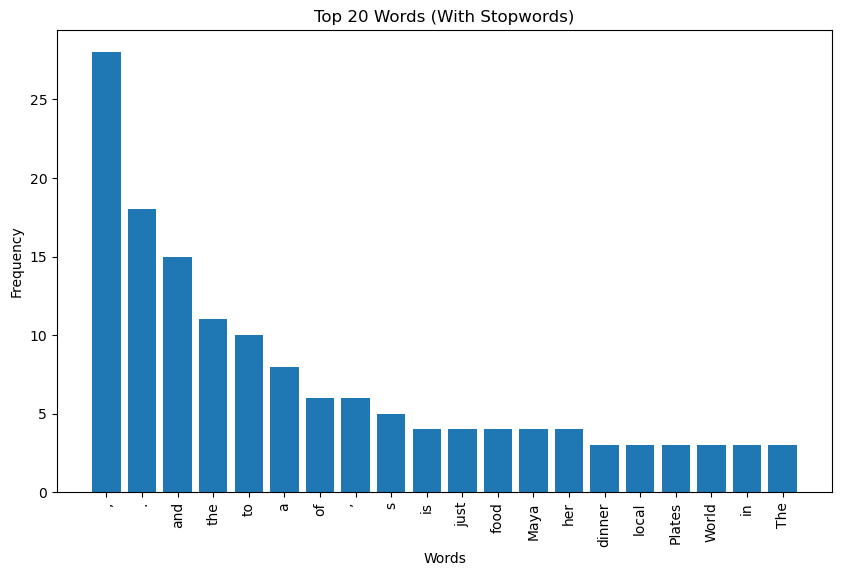

In [13]:
# Générer un graphique en barres des 20 mots les plus fréquents (y compris les stopwords)
plt.figure(figsize=(10,6))
plt.bar(*zip(*top_20_words))
plt.title('Top 20 Words (With Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

En observant le graphique on observe qu'il y a beaucoup de stopword dans le texte. 

In [20]:
# Supprimer la ponctuation et les stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Créer une distribution de fréquence avec les mots filtrés
freq_dist = FreqDist(filtered_words)

# Obtenir les 20 mots les plus fréquents
top_20_words_filtered = freq_dist.most_common(20)

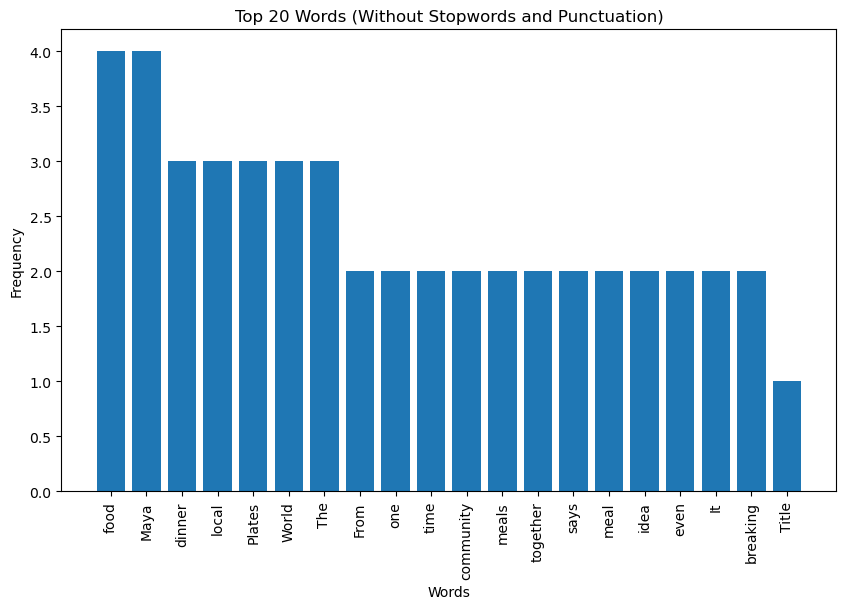

In [21]:
# Afficher un graphique en barres des 20 mots les plus fréquents après le nettoyage
plt.figure(figsize=(10,6))
plt.bar(*zip(*top_20_words_filtered))
plt.title('Top 20 Words (Without Stopwords and Punctuation)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()